In [ ]:
//@version=5
indicator("4CEP-T1 & T2 Patterns - Tiny Circle Labels on 3rd Candle", overlay=true, max_boxes_count=500, max_lines_count=500, max_labels_count=500)

// ────────── Candle OHLC
o = open
c = close

// ────────── Bullish/Bearish Functions (body only)
bullish(candle_open, candle_close) => candle_close > candle_open
bearish(candle_open, candle_close) => candle_close < candle_open

// ────────── 4CEP-T1 Pattern Conditions
cond1_T1 = bullish(o[3], c[3])
cond2_T1 = bearish(o[2], c[2])
cond3_T1 = bearish(o[1], c[1]) and c[1] < c[2]
cond4_T1 = bullish(o[0], c[0]) and c[0] > o[1] and c[0] > o[2] and c[0] > c[3]
pattern_T1 = cond1_T1 and cond2_T1 and cond3_T1 and cond4_T1

// ────────── 4CEP-T2 Pattern Conditions
cond1_T2 = bearish(o[3], c[3])
cond2_T2 = bullish(o[2], c[2])
cond3_T2 = bullish(o[1], c[1]) and c[1] > c[2]
cond4_T2 = bearish(o[0], c[0]) and c[0] < o[1] and c[0] < o[2] and c[0] < c[3]
pattern_T2 = cond1_T2 and cond2_T2 and cond3_T2 and cond4_T2

// ────────── Function to draw rectangle + horizontal line + tiny circle label for 3rd candle
draw_rect_line_circle(y_top, y_bottom, y_mid, bar_idx, box_color, label_y, label_color) =>
    box.new( left = bar_idx, right = bar_idx + 5, top = y_top,  bottom = y_bottom, border_color = box_color,  bgcolor = color.new(box_color, 80) )
    line.new( x1 = bar_idx,  y1 = y_mid, x2 = bar_idx + 5, y2 = y_mid, color = color.red,  width = 2, style = line.style_solid )
    label.new(bar_idx, label_y, "", style=label.style_circle, color=label_color, textcolor=color.white, size=size.tiny)

// ────────── Draw rectangles for 4CEP-T1 (Dark Green)
if pattern_T1
    y_top3 = math.max(o[1], c[1])
    y_bottom3 = math.min(o[1], c[1])
    y_mid3 = (y_top3 + y_bottom3)/2
    // Tiny circle label below 3rd candle
    label_y_T1 = y_bottom3 - (y_top3 - y_bottom3)
    draw_rect_line_circle(y_top3, y_bottom3, y_mid3, bar_index[1], color.new(color.green, 60), label_y_T1, color.green)

// ────────── Draw rectangles for 4CEP-T2 (Dark Red)
if pattern_T2
    y_top3 = math.max(o[1], c[1])
    y_bottom3 = math.min(o[1], c[1])
    y_mid3 = (y_top3 + y_bottom3)/2
    // Tiny circle label above 3rd candle
    label_y_T2 = y_top3 + (y_top3 - y_bottom3)
    draw_rect_line_circle(y_top3, y_bottom3, y_mid3, bar_index[1], color.new(color.red, 60), label_y_T2, color.red)


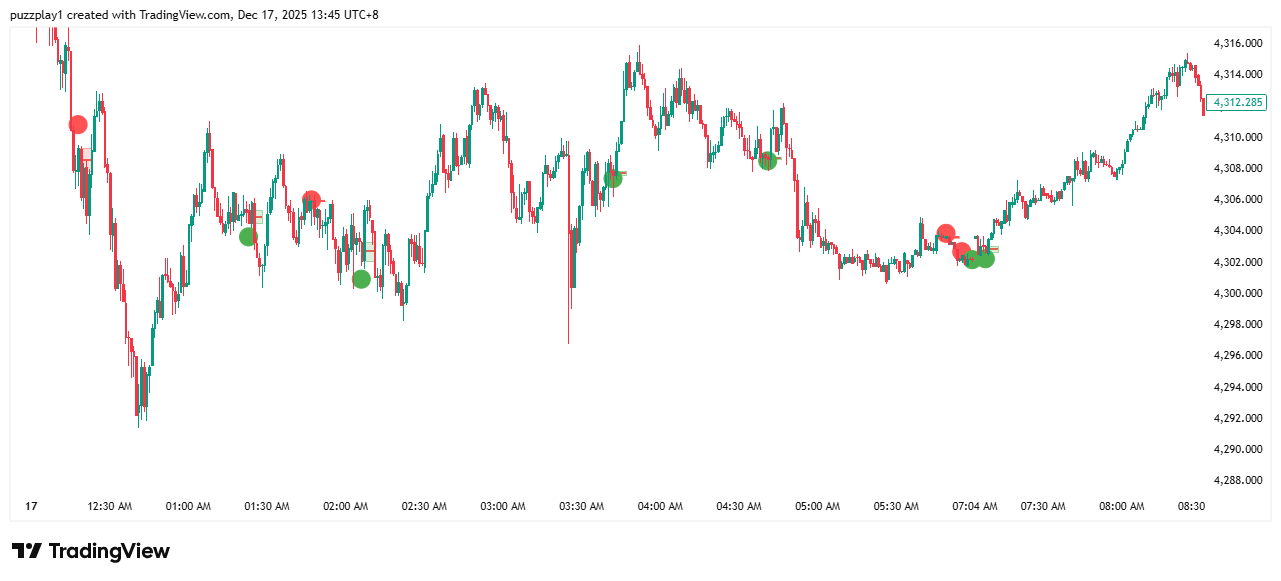